<a href="https://colab.research.google.com/github/angad542/Online-Fraud-Detection/blob/main/OnlineFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sai Varsha 102217040
#Angad Singh Marwaha  102217055
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/onlinefraud.csv')

# Drop the irrelevant column (safe handling if the column is missing)
df.drop('isFlaggedFraud', axis=1, inplace=True, errors='ignore')

# Display dataset info
df.info()


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
429912,18,CASH_IN,20280.28,C1091051046,15195845.82,15216126.10,C1750563752,342808.78,349684.94,0
693898,36,CASH_IN,334157.86,C775041800,320535.00,654692.86,C2049437522,54243.83,0.00,0
3311013,252,CASH_OUT,27086.13,C670881275,587.00,0.00,C862751551,1687737.73,1714823.86,0
441640,19,PAYMENT,2344.18,C587695683,195.00,0.00,M762354844,0.00,0.00,0
2660084,210,CASH_OUT,45355.16,C194920652,35451.00,0.00,C608835771,854073.35,899428.50,0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
#Calculate Min and Max Values
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 | 9.24455e+07 |
|  1 | oldbalanceOrg  |           0 |  5.9585e+07 |
|  2 | newbalanceOrig |           0 |  4.9585e+07 |
|  3 | oldbalanceDest |           0 | 3.56016e+08 |
|  4 | isFraud        |           0 |           1 |


In [ ]:
# Optimize Data Types
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [ ]:
# Check duplicate values
df.duplicated().sum()
#used -> df = df.drop_duplicates() to remove duplicates

0

In [ ]:
#Data Visualization
sns.set_style('whitegrid')# add white background with grid lines
plt.rcParams['figure.figsize'] = (8,6) # 8 inches width, 6 inches height

In [ ]:
df['step'].value_counts()

,count
step,
19,51352
18,49579
187,49083
235,47491
307,46968
...,...
432,4
706,4
693,4


<ipython-input-7-1979f10028ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')


Text(0, 0.5, 'Number of transactions')

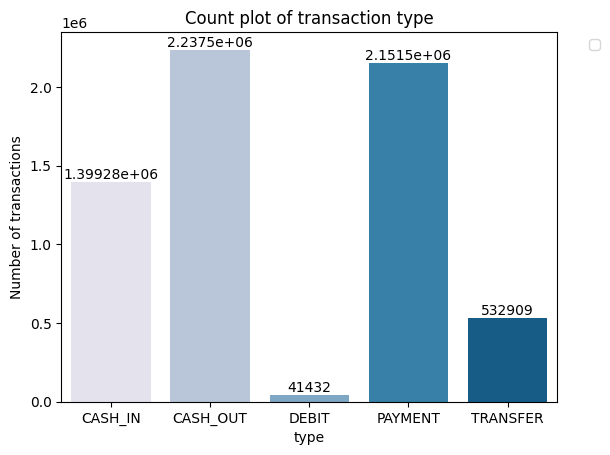

In [ ]:
#Transaction Types Count Plot
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

Text(0.5, 1.0, 'Distribution of transaction amount')

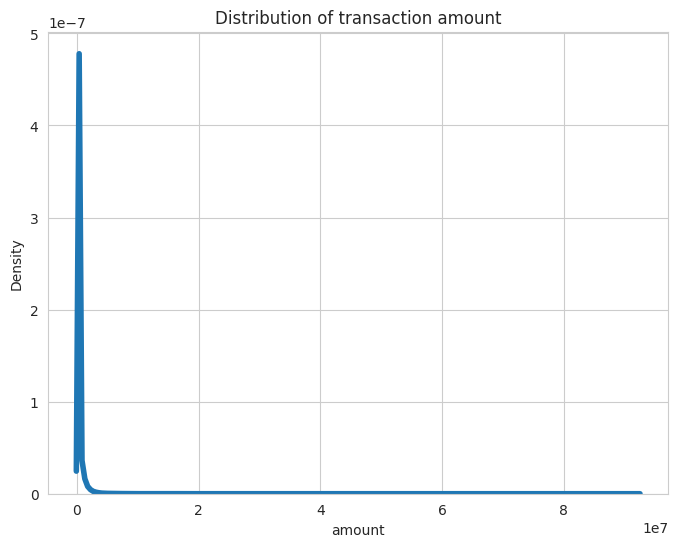

In [ ]:
#Plot a Kernel Density Estimate (KDE) for the amount column to visualize its distribution.
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')
#Right Skewed -> Mode<Median<Mean

<ipython-input-13-67fc7b94ee51>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=df, palette='PuBu')


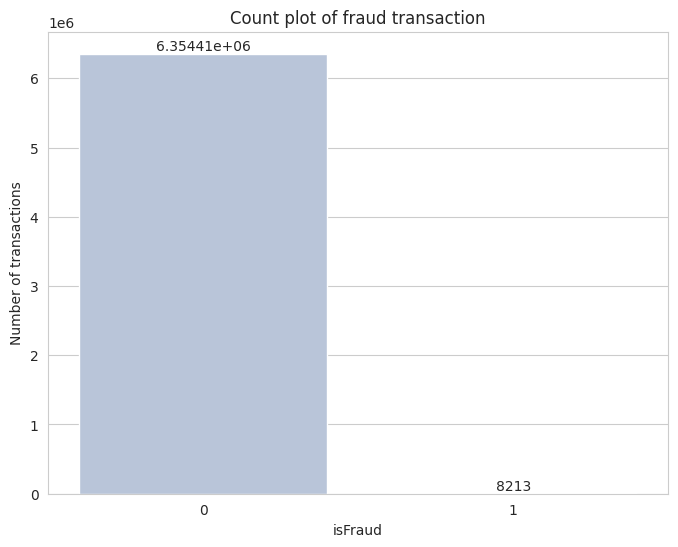

In [ ]:
#Fraud Transactions Count Plot
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

<ipython-input-8-9cb63fad8ee6>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['type', 'isFraud']).size().unstack()


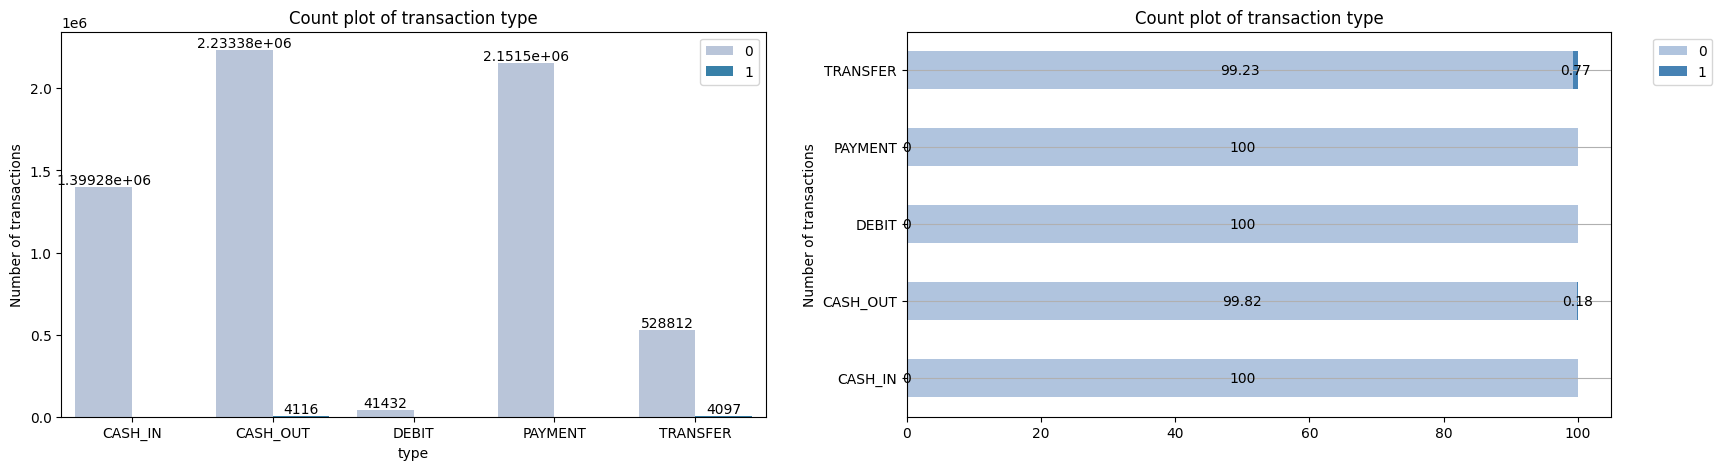

In [ ]:
# Analyze how transaction types relate to fraud occurrences.
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Text(0, 0.5, 'Number of transactions')

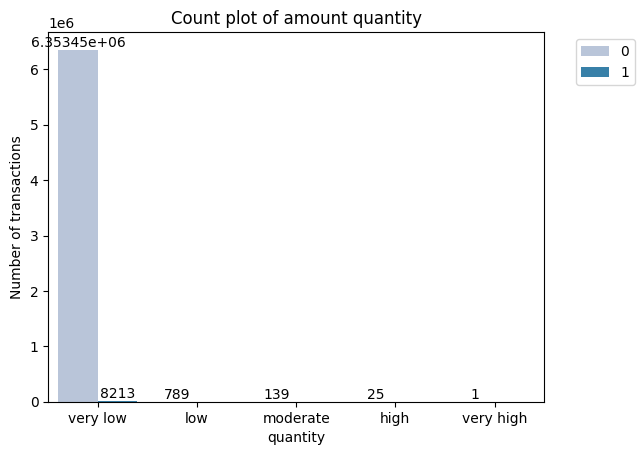

In [ ]:
#Categorize amount into 5 bins and analyze fraud patterns across these bins.
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

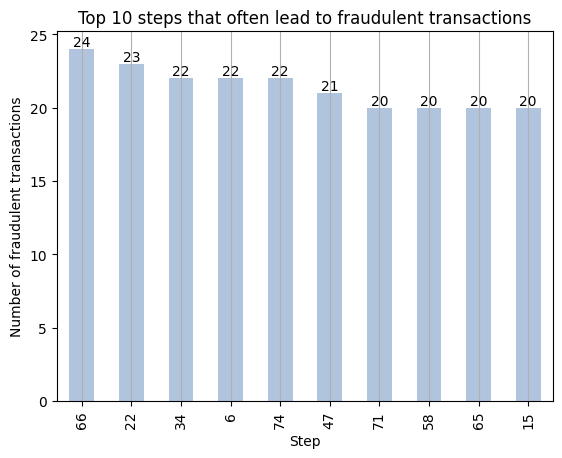

In [ ]:
#Identify the top 10 step values (transaction time steps) associated with fraudulent transactions.
df1 = df[df['isFraud'] == 1]
df1_valid_steps = df1[df1['step'] <= 95]

# Get the top 10 steps for fraudulent transactions
df2 = df1_valid_steps['step'].value_counts().head(10)

# Plot the top 10 steps
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')
plt.show()
#peak activity around 6am-10 am and 2pm-6pm

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

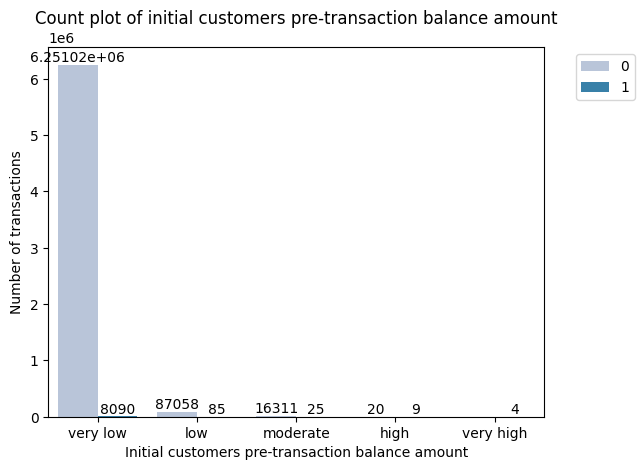

In [ ]:
#Categorize oldbalanceOrg (initial balance before the transaction) into bins and analyze its relation to fraud.
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

<ipython-input-12-cf2dc2bc91ee>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric_df, x='Attribute', y='Value', palette='PuBu')


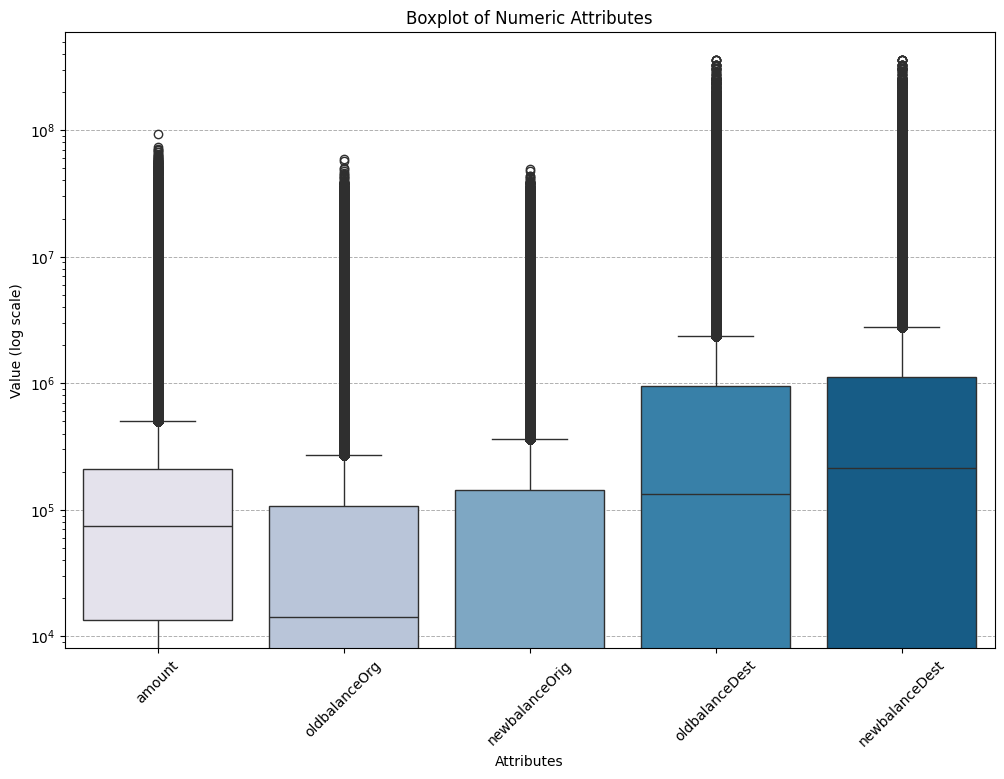

In [ ]:
# Select numeric attributes for visualization
numeric_cols = [ 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create a long-form DataFrame for plotting
numeric_df = df[numeric_cols].melt(var_name='Attribute', value_name='Value')#required for creating a group boxplot where columns are now rows under->attribute, and rest of the values are under column->value

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df, x='Attribute', y='Value', palette='PuBu')
plt.yscale('log')  # Log scale to handle large ranges in values
plt.title('Boxplot of Numeric Attributes')
plt.xticks(rotation=45)
plt.ylabel('Value (log scale)')
plt.xlabel('Attributes')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


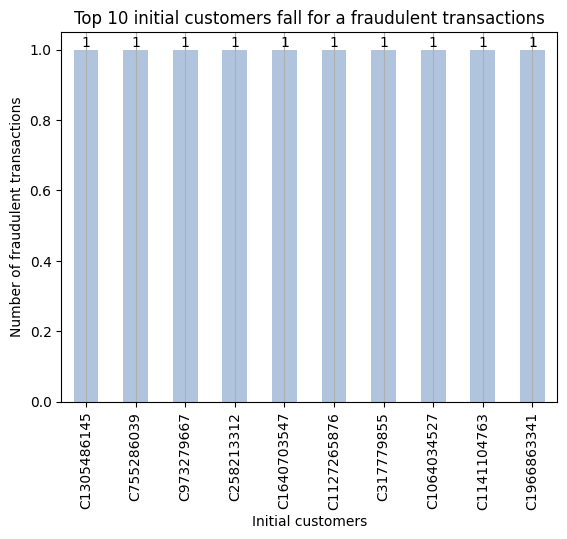

In [ ]:
#Highlight the most frequently involved customers (nameOrig) in fraudulent transactions.
df1 = df[df['isFraud']==1]
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

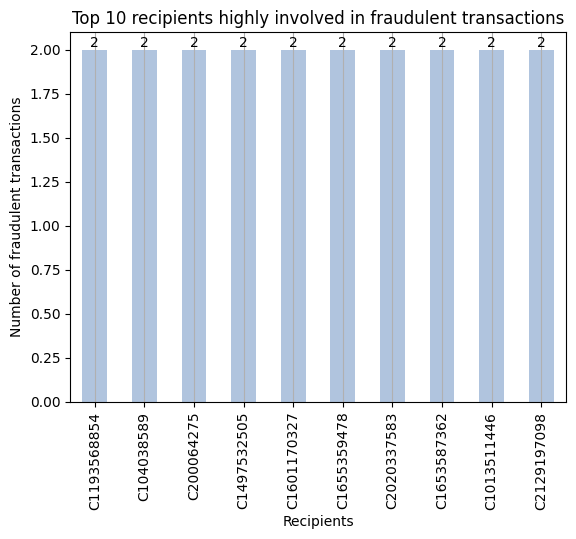

In [ ]:
#Highlight the most frequently involved recipients (nameDest) in fraudulent transactions.

df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

Text(0.5, 0, 'Recipient pre-transaction balance amount')

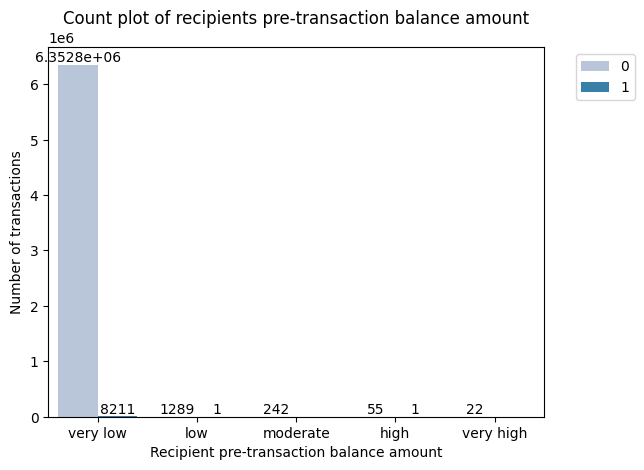

In [ ]:
#Analyze oldbalanceDest (recipient's balance before the transaction) and its relationship with fraud.
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

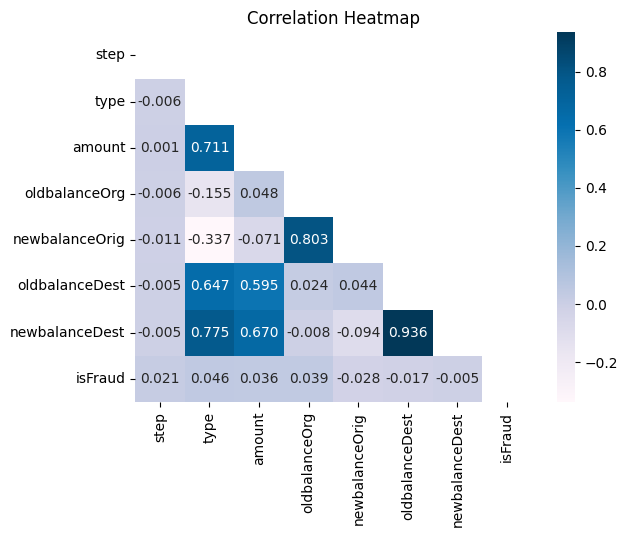

In [ ]:
#Display the correlations between numerical features after excluding irrelevant ones.
exclude_features = ['nameOrig','nameDest','oldbalanceDest_amt','oldbalanceOrg_amt','quantity']
filtered_df = df.drop(columns=exclude_features)
corr_matrix = filtered_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cbar=True,
    annot=True,
    fmt='.3f',
    cmap='PuBu'
)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4}) #label encoding

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # 0 mean,unit variance
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder


# Prepare features and target variable
X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

# Validate shapes and balance
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Class distribution in y_train:\n{y_train.value_counts()}")

X_train shape: (13140, 5), y_train shape: (13140,)
Class distribution in y_train:
isFraud
0    6570
1    6570
Name: count, dtype: int64


In [ ]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    for name, model in classifiers.items():
        print(f'{name}:')

        scores = cross_validate(model, X, y, scoring=scoring, cv=skfold, n_jobs=-1)#n_jobs=-1 runs cross validation in || CPU cores

        for score in scoring:
            test_scores = scores[f'test_{score}']
            print(f'Mean {score} score: {test_scores.mean():.3f} ({test_scores.std():.3f})')

        print('\n')


In [ ]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced'),
                'Logistic Regression': LogisticRegression(class_weight='balanced'),
                'KNN':KNeighborsClassifier(n_neighbors=5, weights='distance')
              }

In [ ]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.984 (0.002)
Mean precision score: 0.974 (0.002)
Mean recall score: 0.994 (0.003)
Mean f1 score: 0.984 (0.002)
Mean roc_auc score: 0.998 (0.000)


Logistic Regression:
Mean accuracy score: 0.839 (0.008)
Mean precision score: 0.832 (0.005)
Mean recall score: 0.849 (0.016)
Mean f1 score: 0.841 (0.009)
Mean roc_auc score: 0.923 (0.006)


KNN:
Mean accuracy score: 0.923 (0.003)
Mean precision score: 0.926 (0.006)
Mean recall score: 0.920 (0.005)
Mean f1 score: 0.923 (0.003)
Mean roc_auc score: 0.969 (0.001)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.98      1.00      0.99   1239823
    Fraud [1]       0.99      0.05      0.09     32701

     accuracy                           0.98   1272524
    macro avg       0.98      0.52      0.54   1272524
 weighted avg       0.98      0.98      0.96   1272524
 



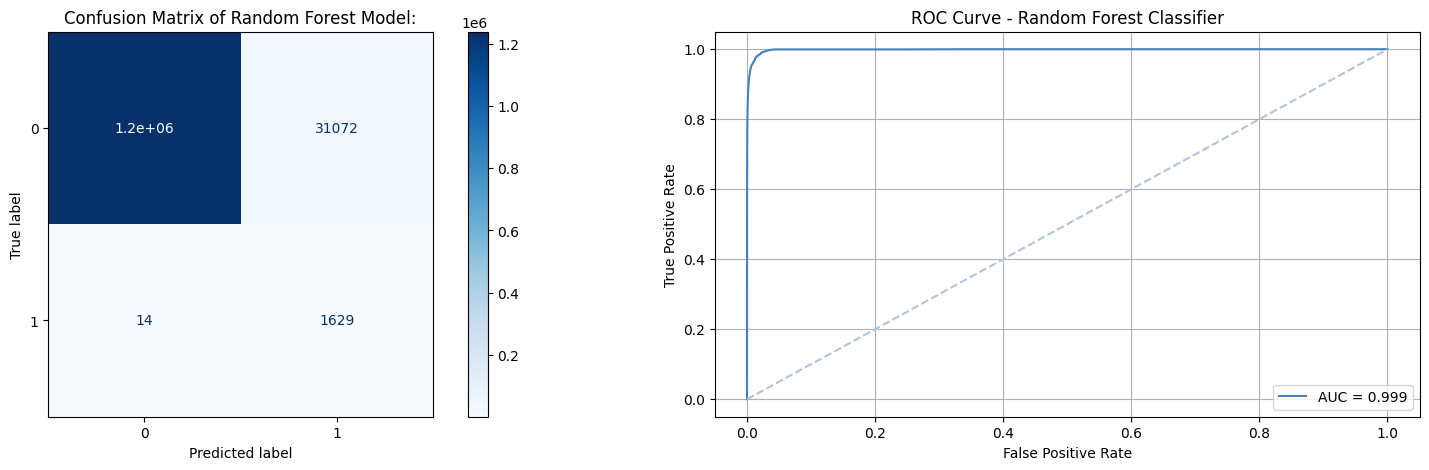

In [ ]:
#Random Forest model
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')

fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax[0])
ax[0].grid(False)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94   1270881
           1       0.01      0.89      0.02      1643

    accuracy                           0.88   1272524
   macro avg       0.50      0.89      0.48   1272524
weighted avg       1.00      0.88      0.93   1272524



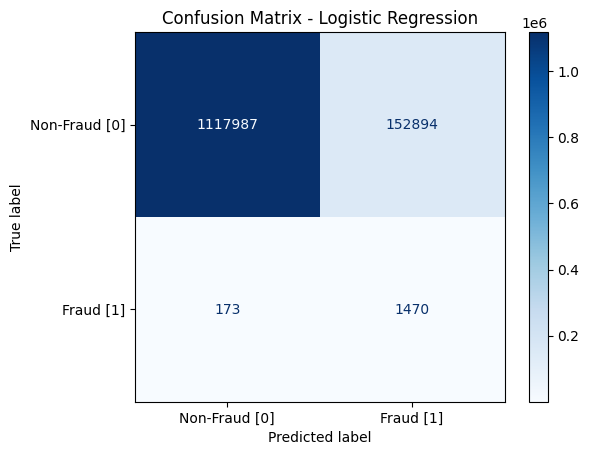

<ipython-input-36-3700a8405c1a>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='grey')  # Diagonal line


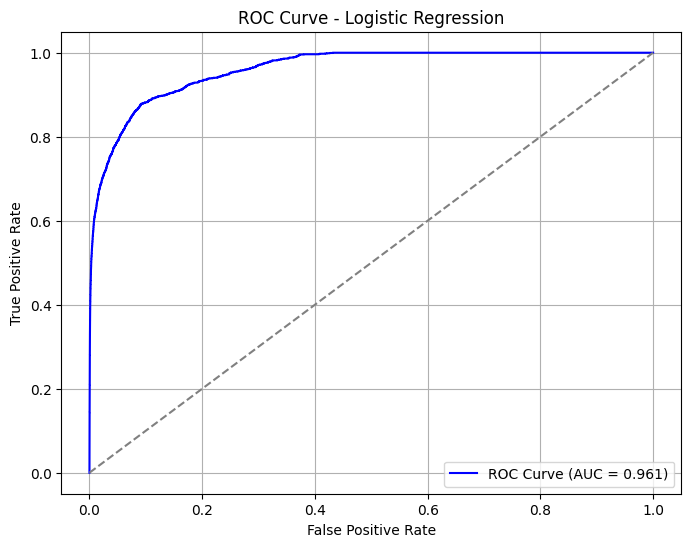

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test)
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

print("Classification Report:\n", classification_report(y_test, y_pred))
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Fraud [0]', 'Fraud [1]'])
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', color='grey')  # Diagonal line
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


X_train shape: (13140, 8), y_train shape: (13140,)
Class distribution in y_train:
isFraud
0    6570
1    6570
Name: count, dtype: int64
KNN Classification Report:

               precision    recall  f1-score   support

Non-Fraud [0]       1.00      0.94      0.97   1270881
    Fraud [1]       0.02      0.92      0.04      1643

     accuracy                           0.94   1272524
    macro avg       0.51      0.93      0.50   1272524
 weighted avg       1.00      0.94      0.97   1272524



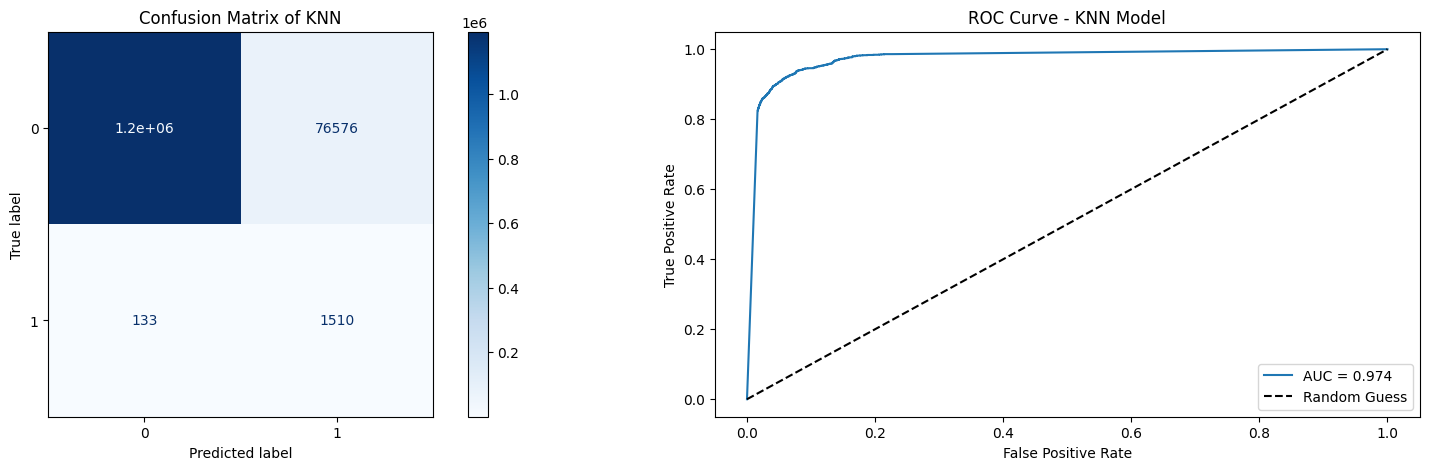

In [ ]:

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

# Resample the training set to handle class imbalance
sampler = RandomUnderSampler(sampling_strategy='not minority')
X_train, y_train = sampler.fit_resample(X_train, y_train)

# Validate shapes and balance
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Class distribution in y_train:\n{y_train.value_counts()}")

# Define the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train KNN on full training set and evaluate on test set
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]


print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud [0]', 'Fraud [1]']))

# Plot Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix of KNN")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
ax[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
ax[1].plot([0, 1], [0, 1], 'k--', label="Random Guess")
ax[1].set_title("ROC Curve - KNN Model")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend()
plt.show()

